In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

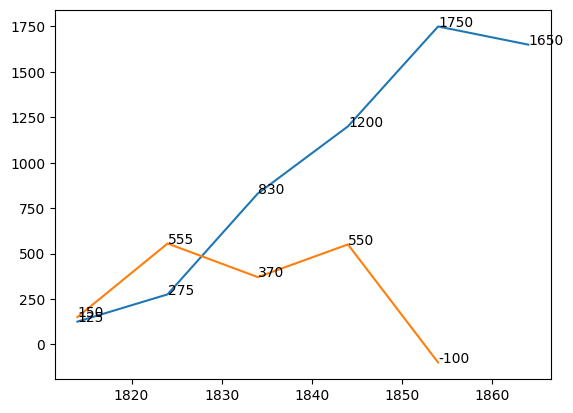

In [29]:
# 1.2.1
year = np.array([1814, 1824, 1834, 1844, 1854, 1864])
pop = np.array([125, 275, 830, 1200, 1750, 1650])
plt.plot(year, pop)
for a,b in zip(year, pop): 
    plt.text(a, b, str(b))
pop_delta = pop[1:] - pop[:-1]
plt.plot(year[:-1], pop_delta)
for a,b in zip(year[:-1], pop_delta): 
    plt.text(a, b, str(b))


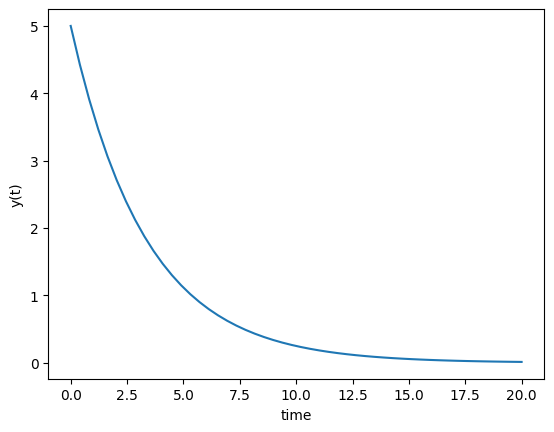

In [30]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

# function that returns dy/dt
def model(y,t):
    k = 0.3
    dydt = -k * y
    return dydt

# initial condition
y0 = 5

# time points
t = np.linspace(0,20)

# solve ODE
y = odeint(model,y0,t)

# plot results
plt.plot(t,y)
plt.xlabel('time')
plt.ylabel('y(t)')
plt.show()

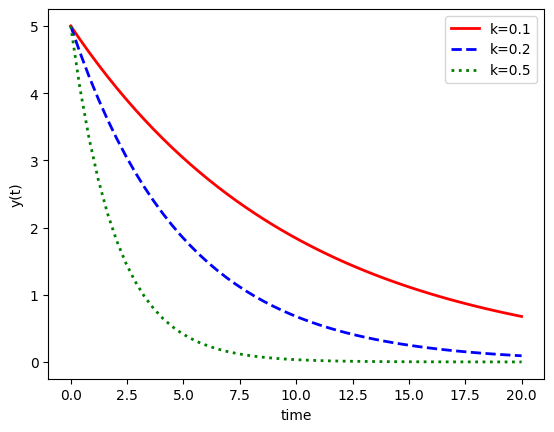

In [31]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

# function that returns dy/dt
def model(y,t,k):
    dydt = -k * y
    return dydt

# initial condition
y0 = 5

# time points
t = np.linspace(0,20)

# solve ODEs
k = 0.1
y1 = odeint(model,y0,t,args=(k,))
k = 0.2
y2 = odeint(model,y0,t,args=(k,))
k = 0.5
y3 = odeint(model,y0,t,args=(k,))

# plot results
plt.plot(t,y1,'r-',linewidth=2,label='k=0.1')
plt.plot(t,y2,'b--',linewidth=2,label='k=0.2')
plt.plot(t,y3,'g:',linewidth=2,label='k=0.5')
plt.xlabel('time')
plt.ylabel('y(t)')
plt.legend()
plt.show()

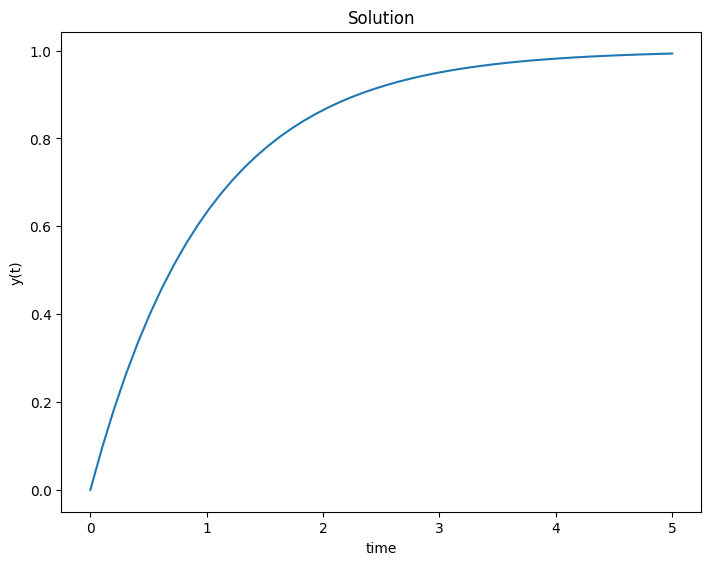

In [32]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

def model(y, t):
    dydt = -y + 1
    return dydt

y0 = 0

t = np.linspace(0, 5)

y = odeint(model, y0, t)

fig = plt.figure()
ax = fig.add_axes([0, 0, 1, 1])
y = ax.plot(t, y)
ax.set_xlabel('time')
ax.set_ylabel('y(t)')
ax.set_title('Solution')
plt.show()

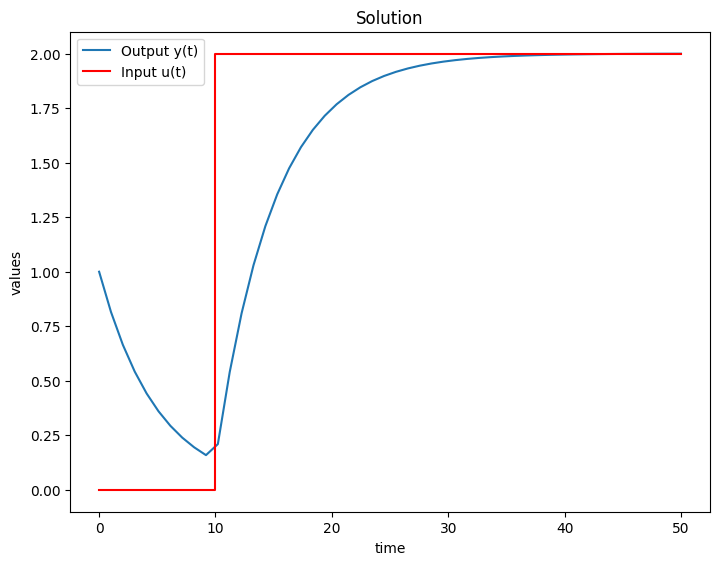

In [33]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

def model(y, t):
    if t < 10:
        u = 0
    else:
        u = 2
    dydt = (-y + u)/5
    return dydt

y0 = 1

t = np.linspace(0, 50)

y = odeint(model, y0, t)

fig = plt.figure()
ax = fig.add_axes([0, 0, 1, 1])
ax.plot(t, y, label = 'Output y(t)')
ax.plot([0, 10, 10, 50], [0, 0, 2, 2], 'r-', label = 'Input u(t)')
ax.set_xlabel('time')
ax.set_ylabel('values')
ax.set_title('Solution')
ax.legend(loc = 'best')
plt.show()

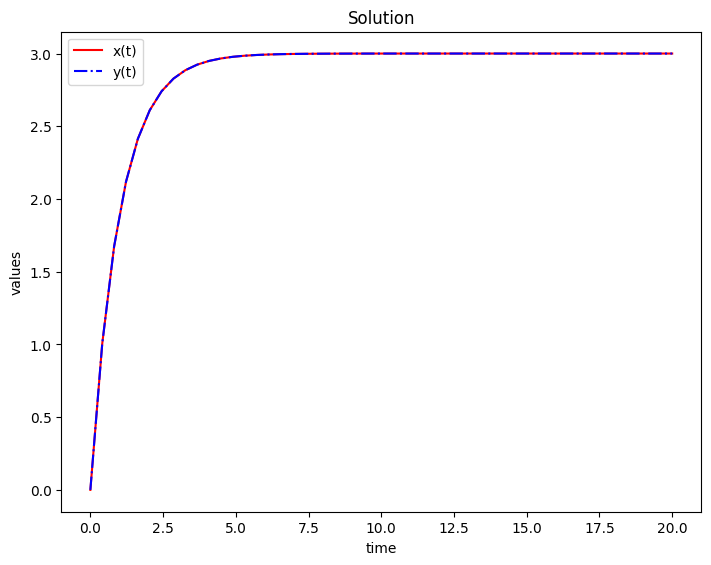

In [34]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
import math

# function that returns dy/dt
def modelx(x,t):
    dxdt = 3*math.exp(-t)
    return dxdt

def modely(y, t):
    dydt = 3 - y
    return dydt

# initial condition
x0 = 0
y0 = 0

# time points
t = np.linspace(0,20)

# solve ODE
x = odeint(modelx, x0, t)
y = odeint(modely, y0, t)

# plot results
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.plot(t, x, color = 'r', linestyle = '-', label = 'x(t)')
ax.plot(t, y, color = 'b', linestyle = '-.', label = 'y(t)')
ax.set_xlabel('time')
ax.set_ylabel('values')
ax.set_title('Solution')
ax.legend(loc = 'best')
plt.show()

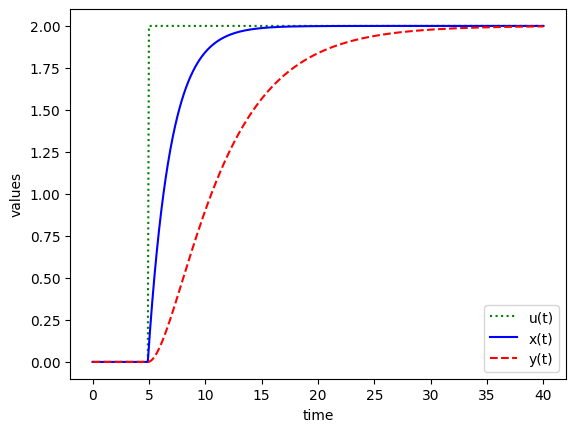

In [35]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

# function that returns dz/dt
def model(z,t,u):
    x = z[0]
    y = z[1]
    dxdt = (-x + u)/2.0
    dydt = (-y + x)/5.0
    dzdt = [dxdt,dydt]
    return dzdt

# initial condition
z0 = [0,0]

# number of time points
n = 401

# time points
t = np.linspace(0,40,n)

# step input
u = np.zeros(n)
# change to 2.0 at time = 5.0
u[50:] = 2.0

# store solution
x = np.empty_like(t)
y = np.empty_like(t)
# record initial conditions
x[0] = z0[0]
y[0] = z0[1]

# solve ODE
for i in range(1,n):
    # span for next time step
    tspan = [t[i-1],t[i]]
    # solve for next step
    z = odeint(model,z0,tspan,args=(u[i],))
    # store solution for plotting
    x[i] = z[1][0]
    y[i] = z[1][1]
    # next initial condition
    z0 = z[1]

# plot results
plt.plot(t,u,'g:',label='u(t)')
plt.plot(t,x,'b-',label='x(t)')
plt.plot(t,y,'r--',label='y(t)')
plt.ylabel('values')
plt.xlabel('time')
plt.legend(loc='best')
plt.show()

Text(0.5, 1.0, 'Love between Romeo and Juliet')

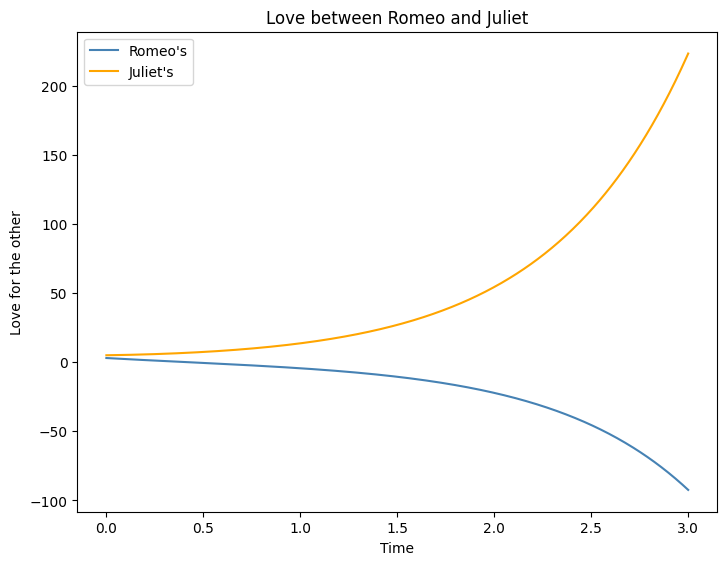

In [126]:
import numpy as np
from scipy.integrate import odeint
import scipy.integrate as integrate
import matplotlib.pyplot as plt

a = -1
b = -1
c = -1
d = 1
R0 = 3
J0 = 5
tmax = 3

# function that returns dz/dt
def model(z,t):
    x = z[0]
    y = z[1]
    dxdt = a*x + b*y
    dydt = c*x + d*y
    dzdt = [dxdt, dydt]
    return dzdt

# initial condition
z0 = [R0,J0]

# number of time points
n = 500

# time points
t = np.linspace(0,tmax,n)

sol = odeint(model, z0, t)
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.plot(t, sol[:, 0], color = 'steelblue')
ax.plot(t, sol[:, 1], color = 'orange')
ax.set_xlabel("Time")
ax.set_ylabel("Love for the other")
ax.legend(labels = ("Romeo's", "Juliet's"), loc = 'best')
ax.set_title("Love between Romeo and Juliet")

The system has a fixed point in 0,0


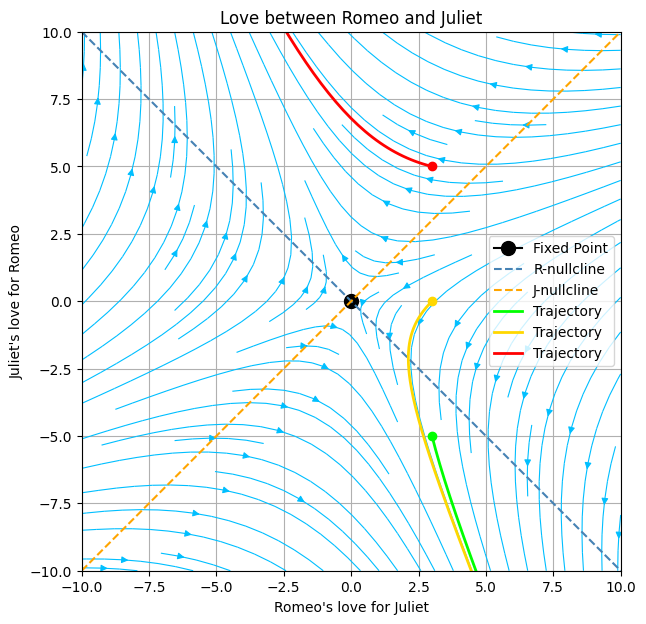

In [123]:
lo = -10
hi = 10
tmax = 10
r0s = [R0,R0,R0]
j0s = [J0, 0, -J0]

y1 = np.linspace(lo, hi, 20)
y2 = np.linspace(lo, hi, 20)

Y1, Y2 = np.meshgrid(y1, y2)

t = 0

u, v = np.zeros(Y1.shape), np.zeros(Y2.shape)

NI, NJ = Y1.shape

for i in range(NI):
    for j in range(NJ):
        x = Y1[i, j]
        y = Y2[i, j]
        yprime = model([x, y], t)
        u[i,j] = yprime[0]
        v[i,j] = yprime[1]

# find fixed points
fp = []

def find_fixed_points(r):
    for x in range(r):
        for y in range(r):
            if ((a*x + b*y == 0) and (c*x + d*y == 0)):
                fp.append((x,y))
                print('The system has a fixed point in %s,%s' % (x,y))
    return fp

find_fixed_points(10)


plt.figure(figsize = (7, 7))
plt.streamplot(Y1, Y2, u, v, linewidth = 0.8 ,color = 'deepskyblue') # vector stream

x = np.linspace(lo, hi, 500)
if (a*d == b*c):
    if b != 0:
        y = -a*x / b
        plt.plot(x, y, '--', label = "Line of Fixed Points", color = 'black') # line of fps
else:
    for point in fp:
        plt.plot(point[0],point[1], "black", marker = "o", markersize = 10.0, label = "Fixed Point")
    if b != 0:
        y = -a*x / b
        plt.plot(x, y, '--', label = "R-nullcline", color = 'steelblue') # x-nullcline
    if d != 0:
        y = -c*x / d
        plt.plot(x, y, '--', label = "J-nullcline", color = 'orange') # y-nullcline

for r0,j0 in zip(r0s, j0s):
    tspan = np.linspace(0, tmax, 500)
    z0 = [r0, j0]
    sol = odeint(model, z0, tspan)
    if j0 < 0:
        plt.plot(sol[:,0], sol[:,1], label = "Trajectory", color = "lime", linewidth = 2) # path
        plt.plot([sol[0,0]], [sol[0,1]], 'o', color = "lime") # start
        #plt.plot([sol[-1,0]], [sol[-1,1]], 's', color = "green") # end
    elif j0 > 0:
        plt.plot(sol[:,0], sol[:,1], label = "Trajectory", color = "red", linewidth = 2) # path
        plt.plot([sol[0,0]], [sol[0,1]], 'o', color = "red") # start
        #plt.plot([sol[-1,0]], [sol[-1,1]], 's', color = "magenta") # end   
    else:
        plt.plot(sol[:,0], sol[:,1], label = "Trajectory", color = "gold", linewidth = 2) # path
        plt.plot([sol[0,0]], [sol[0,1]], 'o', color = "gold") # start
        #plt.plot([sol[-1,0]], [sol[-1,1]], 's', color = "yellow") # end

plt.axis('square')
plt.axis([lo, hi, lo, hi])
plt.xlabel("Romeo's love for Juliet")
plt.ylabel("Juliet's love for Romeo")
plt.title("Love between Romeo and Juliet")
plt.legend(loc = 'best')
plt.grid()
plt.show()
# Q = plt.quiver(Y1, Y2, u, v, color='r')

# plt.xlabel('$y_1$')
# plt.ylabel('$y_2$')
# plt.xlim([-2, 8])
# plt.ylim([-4, 4])

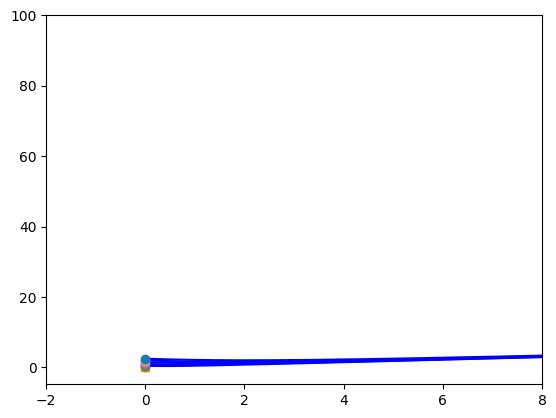

In [38]:
for y20 in [0, 0.5, 1, 1.5, 2, 2.5]:
    tspan = np.linspace(0, 3, 200)
    y0 = [0.0, y20]
    ys = odeint(model, y0, tspan)
    plt.plot(ys[:,0], ys[:,1], 'b-') # path
    plt.plot([ys[0,0]], [ys[0,1]], 'o') # start
    plt.plot([ys[-1,0]], [ys[-1,1]], 's') # end
    

plt.xlim([-2, 8])
plt.show()

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


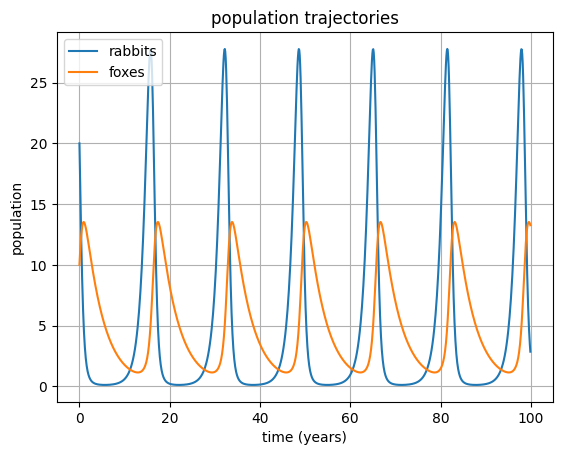

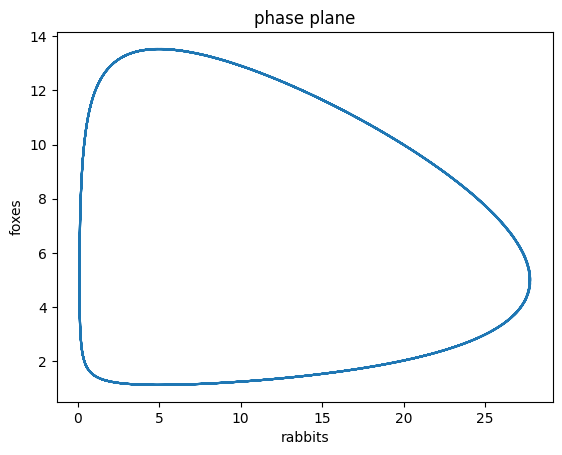

In [39]:
import numpy as n
import pylab as p
import scipy.integrate as integrate

def dr(r, f):
    return alpha*r - beta*r*f

def df(r, f):
    return gamma*r*f - delta*f

def derivs(state, t):
# """
# Map the state variable [rabbits, foxes] to the derivitives
# [deltar, deltaf] at time t
# """
#print t, state
    r, f = state # rabbits and foxes
    deltar = dr(r, f) # change in rabbits
    deltaf = df(r, f) # change in foxes
    return deltar, deltaf

alpha, delta = 1, .25
beta, gamma = .2, .05

# the initial population of rabbits and foxes
r0 = 20
f0 = 10

t = n.arange(0.0, 100, 0.1)

y0 = [r0, f0] # the initial [rabbits, foxes] state vector
y = integrate.odeint(derivs, y0, t)
r = y[:,0] # extract the rabbits vector
f = y[:,1] # extract the foxes vector

p.figure()
p.plot(t, r, label='rabbits')
p.plot(t, f, label='foxes')
p.xlabel('time (years)')
p.ylabel('population')
p.title('population trajectories')
p.grid()
p.legend()
p.savefig('lotka_volterra.png', dpi=150)
p.savefig('lotka_volterra.eps')


p.figure()
p.plot(r, f)
p.xlabel('rabbits')
p.ylabel('foxes')
p.title('phase plane')


# # make a direction field plot with quiver
# rmax = 1.1 * r.max()
# fmax = 1.1 * f.max()
# R, F = n.meshgrid(n.arange(-1, rmax), n.arange(-1, fmax))
# dR = dr(R, F)
# dF = df(R, F)
# p.quiver(R, F, dR, dF)


# R, F = n.meshgrid(n.arange(-1, rmax, .1), n.arange(-1, fmax, .1))
# dR = dr(R, F)
# dF = df(R, F)

# p.contour(R, F, dR, levels=[0], linewidths=3, colors='black')
# p.contour(R, F, dF, levels=[0], linewidths=3, colors='black')
# p.ylabel('foxes')
# p.title('trajectory, direction field and null clines')

# p.savefig('lotka_volterra_pplane.png', dpi=150)
# p.savefig('lotka_volterra_pplane.eps')


p.show()

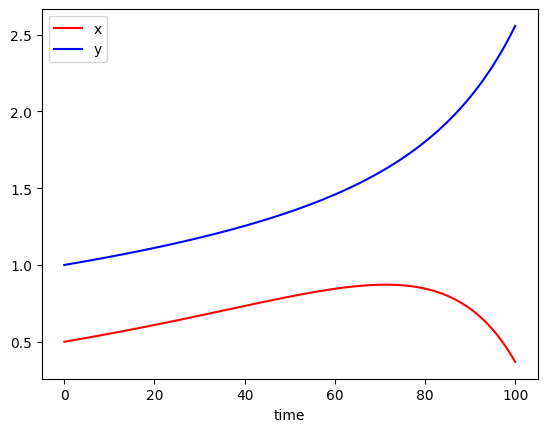

In [40]:
import matplotlib.pyplot as plt
import math

def f(x,y):
    return 3*x-y*y
def g(x,y):
    return y*y - x

x = []
y = []

def IsoNull(x0, y0, dt, time):  
    x.append(x0)
    y.append(y0)
    for i in range(time):
        x.append(x[i] + (f(x[i],y[i])) * dt)
        y.append(y[i] + (g(x[i],y[i])) * dt)
    return x, y

IsoNull(0.5, 1, 0.01, 100)

plt.plot(x, 'r-', label='x')
plt.plot(y, 'b-', label='y')
plt.xlabel("time")
plt.legend(loc='best')